<a href="https://colab.research.google.com/github/AfzalNMSU/Graph_Link_Prediction/blob/main/LP_KG_Average.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install node2vec 

  Created wheel for node2vec: filename=node2vec-0.4.3-cp37-none-any.whl size=5980 sha256=dd268b48f89149d5876b275bb58816424e9df853d2e7f3297032842ea0d329ab
  Stored in directory: /root/.cache/pip/wheels/34/f4/60/55708b5e797260310451d919c8f898bbd4acd1901367001f20
Successfully built node2vec


In [2]:
# from nodevectors.embedders import Node2Vec
from node2vec import Node2Vec
import networkx as nx

class Node2Vec(Node2Vec):
  """
  Parameters
  ----------
  p : float
      p parameter of node2vec
  q : float
      q parameter of node2vec
  d : int
      dimensionality of the embedding vectors
  """
  def __init__(self, graph, p=1, q=1, d=32, seed = 0):
    super().__init__(
                     graph = graph,
                     walk_length=10,
                     p=p,
                     q=q,
                     dimensions =d
                  )

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

In [4]:
#Loading the Karate club graph from Networkx
KG = nx.karate_club_graph()

In [5]:
print(nx.number_of_nodes(KG))
print(nx.number_of_edges(KG))
print(nx.is_directed(KG))

34
78
False


In [6]:
type(KG)

networkx.classes.graph.Graph

In [7]:
edges=KG.edges
type(edges)

networkx.classes.reportviews.EdgeView

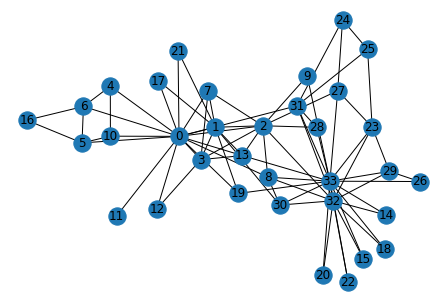

In [8]:
nx.draw(KG, with_labels=True)
plt.show()

In [9]:

# Fit embedding model to the Karate Club graph
n2v_model = Node2Vec(KG, 1, 1, 4, 1)

# Embed nodes
model = n2v_model.fit(window=10, min_count=1, batch_words=4)

# Node to vec representation
K8 =  model.wv.vectors
K8
K8.shape

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 55.45it/s]

(34, 4)

In [10]:
#K8

In [11]:
from node2vec.edges import HadamardEmbedder, AverageEmbedder, WeightedL1Embedder, WeightedL2Embedder

edges_embs = AverageEmbedder(keyed_vectors=model.wv)

In [12]:
from itertools import combinations
all_possible_edges = list(combinations(KG.nodes(), 2))

embeddings = []
for edge in all_possible_edges:
  edge_found = 0
  if KG.has_edge(edge[0], edge[1]):
    edge_found = 1
  edge_tup = tuple(str(x) for x in edge)
  # print(edges_embs[edge_tup])
  embeddings.append([edges_embs[edge_tup][0], 
                    edges_embs[edge_tup][1], edges_embs[edge_tup][2], 
                    edges_embs[edge_tup][3],edge_found])

In [13]:
len(embeddings)

561

In [14]:
df = pd.DataFrame(embeddings, columns=['x_a', 'x_b', 'x_c', 'x_d', 'y'])
df


,x_a,x_b,x_c,x_d,y
0,-0.896007,-0.290936,0.602308,-0.206755,1
1,-1.052849,-0.330437,0.595828,-0.249251,1
2,-0.937646,-0.314807,0.549464,-0.291611,1
3,-0.867548,-0.258897,0.556458,-0.239069,1
4,-0.998770,-0.254805,0.670132,-0.167530,1
...,...,...,...,...,...
556,-0.771051,-0.145502,0.468413,-0.166672,1
557,-0.856342,-0.246263,0.538955,-0.147261,1
558,-0.780546,-0.115126,0.608867,-0.154777,1
559,-0.865838,-0.215887,0.679409,-0.135367,1


## SHUFFLING

In [15]:
# converting dataframe to numpy for suffling
dfNumpy = df.to_numpy(dtype=None, copy=False)
dfNumpy

array([[-0.89600706, -0.29093647,  0.60230792, -0.20675512,  1.        ],
       [-1.05284894, -0.33043706,  0.59582752, -0.24925068,  1.        ],
       [-0.93764591, -0.3148067 ,  0.54946434, -0.29161137,  1.        ],
       ...,
       [-0.78054607, -0.11512621,  0.60886669, -0.15477741,  1.        ],
       [-0.86583757, -0.21588673,  0.67940933, -0.13536672,  1.        ],
       [-0.93153584, -0.21611091,  0.70513409, -0.09886378,  1.        ]])

In [16]:
#SHUFFLING
np.random.shuffle(dfNumpy)
dfNumpy_suf = dfNumpy
dfNumpy_suf

array([[-0.76498908, -0.14335345,  0.49032927, -0.15028501,  0.        ],
       [-0.55086648, -0.17281413,  0.31898776, -0.08434375,  0.        ],
       [-0.47591519, -0.05768585,  0.36483654, -0.0766613 ,  0.        ],
       ...,
       [-0.62315196, -0.13948314,  0.38283461, -0.09271347,  0.        ],
       [-0.58186275, -0.08275449,  0.40009409, -0.1688589 ,  0.        ],
       [-0.67212152, -0.19829689,  0.34544453, -0.09870706,  0.        ]])

## NORMALIZATION

In [17]:
from sklearn.preprocessing import Normalizer
dfNumpy_suf_norm = Normalizer(norm='max', copy=False).fit(dfNumpy_suf)
dfNumpy_suf_norm

# axis=0 refers to normalizing each features. axis=1 refers to normalizing samples
# jodi l1/l2 norm deya hoy sekhetre y er je value pawa jay seta diye train kora jayna. kenona protita individual value hoye jay tokhon

Normalizer(copy=False, norm='max')

In [18]:
dfNumpy = dfNumpy_suf_norm.transform(dfNumpy_suf)

In [19]:
type(dfNumpy)

numpy.ndarray

In [20]:
dfNumpy

array([[-1.56015382, -0.2923616 ,  1.        , -0.30649814,  0.        ],
       [-1.72692046, -0.54175788,  1.        , -0.26441063,  0.        ],
       [-1.30446141, -0.15811424,  1.        , -0.21012505,  0.        ],
       ...,
       [-1.6277315 , -0.36434307,  1.        , -0.24217629,  0.        ],
       [-1.45431477, -0.20683756,  1.        , -0.42204797,  0.        ],
       [-1.94567135, -0.57403395,  1.        , -0.28573924,  0.        ]])

## splitting Train & Test

In [21]:
# converting numpy to DataFrame
dfDataframe = pd.DataFrame(dfNumpy, columns = ['x_a', 'x_b', 'x_c', 'x_d', 'y'])


print(type(dfDataframe))
print(dfDataframe)

<class 'pandas.core.frame.DataFrame'>
          x_a       x_b       x_c       x_d    y
0   -1.560154 -0.292362  1.000000 -0.306498  0.0
1   -1.726920 -0.541758  1.000000 -0.264411  0.0
2   -1.304461 -0.158114  1.000000 -0.210125  0.0
3   -1.443499 -0.308768  1.000000 -0.425283  0.0
4   -1.519237 -0.365297  1.000000 -0.331724  0.0
..        ...       ...       ...       ...  ...
556 -0.856342 -0.246263  0.538955 -0.147261  1.0
557 -1.346014 -0.326701  1.000000 -0.366020  0.0
558 -1.627731 -0.364343  1.000000 -0.242176  0.0
559 -1.454315 -0.206838  1.000000 -0.422048  0.0
560 -1.945671 -0.574034  1.000000 -0.285739  0.0

[561 rows x 5 columns]


In [22]:
features = ['x_a', 'x_b', 'x_c', 'x_d']

X = dfDataframe[features]
X_train = X[0:334]
X_train

,x_a,x_b,x_c,x_d
0,-1.560154,-0.292362,1.0,-0.306498
1,-1.726920,-0.541758,1.0,-0.264411
2,-1.304461,-0.158114,1.0,-0.210125
3,-1.443499,-0.308768,1.0,-0.425283
4,-1.519237,-0.365297,1.0,-0.331724
...,...,...,...,...
329,-1.540129,-0.582297,1.0,-0.338434
330,-1.774326,-0.594505,1.0,-0.254697
331,-1.497062,-0.356089,1.0,-0.498987
332,-1.572127,-0.124025,1.0,-0.467480


In [23]:
y = dfDataframe['y']
y_train = y[0:334]
y_train

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
329    0.0
330    0.0
331    0.0
332    0.0
333    0.0
Name: y, Length: 334, dtype: float64

In [24]:
features = ['x_a', 'x_b', 'x_c', 'x_d']

X2 = dfDataframe[features]
X_test = X2[334:562]
X_test

,x_a,x_b,x_c,x_d
334,-1.867571,-0.389657,1.000000,-0.275186
335,-1.327669,-0.233304,1.000000,-0.381179
336,-1.729957,-0.141469,1.000000,-0.205760
337,-1.319469,-0.353952,1.000000,-0.252686
338,-1.193731,-0.095207,1.000000,-0.225668
...,...,...,...,...
556,-0.856342,-0.246263,0.538955,-0.147261
557,-1.346014,-0.326701,1.000000,-0.366020
558,-1.627731,-0.364343,1.000000,-0.242176
559,-1.454315,-0.206838,1.000000,-0.422048


In [25]:
y2 = dfDataframe['y']
y_test = y2[334:562]
y_test

334    0.0
335    0.0
336    0.0
337    0.0
338    0.0
      ... 
556    1.0
557    0.0
558    0.0
559    0.0
560    0.0
Name: y, Length: 227, dtype: float64

## applying RandomForest

In [42]:
from sklearn.ensemble import RandomForestClassifier

classifier = 'RandomForestClassifier'
forest = RandomForestClassifier(max_features="sqrt", max_samples=80)
forest.fit(X_train, y_train)

#print(classifier+ ' classifier for ' +dataset+ ' dataset')
print(classifier+ ' Run Time:')
%timeit forest.fit(X_train, y_train)

print(f"Train score: {forest.score(X_train, y_train)}")

RandomForestClassifier Run Time:
10 loops, best of 5: 132 ms per loop
Train score: 1.0


In [43]:
print(f"Test score: {forest.score(X_test, y_test)}")

forest.score(X_test, y_test)
print('Accuracy for ' +classifier+ ' classifier: %.2f' % forest.score(X_test, y_test))

Test score: 0.9955947136563876
Accuracy for RandomForestClassifier classifier: 1.00


In [44]:
from sklearn import metrics
predicted = forest.predict(X_test)
print(f"Classification report for classifier RandomForestClassifier:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier RandomForestClassifier:
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       195
         1.0       1.00      0.97      0.98        32

    accuracy                           1.00       227
   macro avg       1.00      0.98      0.99       227
weighted avg       1.00      1.00      1.00       227




In [51]:
from sklearn.ensemble import RandomForestClassifier

classifier = 'RandomForestClassifier'
forest = RandomForestClassifier(n_estimators=100, criterion='gini', max_features="sqrt", max_samples=40)
forest.fit(X_train, y_train)

#print(classifier+ ' classifier for ' +dataset+ ' dataset')
print(classifier+ ' Run Time:')
%timeit forest.fit(X_train, y_train)

print(f"Train score: {forest.score(X_train, y_train)}")

RandomForestClassifier Run Time:
10 loops, best of 5: 130 ms per loop
Train score: 1.0


In [52]:
print(f"Test score: {forest.score(X_test, y_test)}")

forest.score(X_test, y_test)
print('Accuracy for ' +classifier+ ' classifier: %.2f' % forest.score(X_test, y_test))

Test score: 1.0
Accuracy for RandomForestClassifier classifier: 1.00


In [53]:
from sklearn import metrics
predicted = forest.predict(X_test)
print(f"Classification report for classifier RandomForestClassifier:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier RandomForestClassifier:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       195
         1.0       1.00      1.00      1.00        32

    accuracy                           1.00       227
   macro avg       1.00      1.00      1.00       227
weighted avg       1.00      1.00      1.00       227




In [54]:
from sklearn.ensemble import RandomForestClassifier

classifier = 'RandomForestClassifier'
forest = RandomForestClassifier(n_estimators=100, criterion='entropy', max_features="sqrt", max_samples=100)
forest.fit(X_train, y_train)

#print(classifier+ ' classifier for ' +dataset+ ' dataset')
print(classifier+ ' Run Time:')
%timeit forest.fit(X_train, y_train)

print(f"Train score: {forest.score(X_train, y_train)}")

RandomForestClassifier Run Time:
10 loops, best of 5: 134 ms per loop
Train score: 1.0


In [55]:
print(f"Test score: {forest.score(X_test, y_test)}")

forest.score(X_test, y_test)
print('Accuracy for ' +classifier+ ' classifier: %.2f' % forest.score(X_test, y_test))

Test score: 1.0
Accuracy for RandomForestClassifier classifier: 1.00


In [56]:
from sklearn import metrics
predicted = forest.predict(X_test)
print(f"Classification report for classifier RandomForestClassifier:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier RandomForestClassifier:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       195
         1.0       1.00      1.00      1.00        32

    accuracy                           1.00       227
   macro avg       1.00      1.00      1.00       227
weighted avg       1.00      1.00      1.00       227




In [63]:
from sklearn.ensemble import RandomForestClassifier

classifier = 'RandomForestClassifier'
forest = RandomForestClassifier(n_estimators=100, criterion='entropy', max_features=None, max_samples=60)
forest.fit(X_train, y_train)

#print(classifier+ ' classifier for ' +dataset+ ' dataset')
print(classifier+ ' Run Time:')
%timeit forest.fit(X_train, y_train)

print(f"Train score: {forest.score(X_train, y_train)}")

RandomForestClassifier Run Time:
10 loops, best of 5: 133 ms per loop
Train score: 1.0


In [64]:
print(f"Test score: {forest.score(X_test, y_test)}")

forest.score(X_test, y_test)
print('Accuracy for ' +classifier+ ' classifier: %.2f' % forest.score(X_test, y_test))

Test score: 1.0
Accuracy for RandomForestClassifier classifier: 1.00


In [65]:
from sklearn import metrics
predicted = forest.predict(X_test)
print(f"Classification report for classifier RandomForestClassifier:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier RandomForestClassifier:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       195
         1.0       1.00      1.00      1.00        32

    accuracy                           1.00       227
   macro avg       1.00      1.00      1.00       227
weighted avg       1.00      1.00      1.00       227




In [60]:
from sklearn.ensemble import RandomForestClassifier

classifier = 'RandomForestClassifier'
forest = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=None, min_samples_split=2, max_features=None, max_samples=90)
forest.fit(X_train, y_train)

#print(classifier+ ' classifier for ' +dataset+ ' dataset')
print(classifier+ ' Run Time:')
%timeit forest.fit(X_train, y_train)

print(f"Train score: {forest.score(X_train, y_train)}")

RandomForestClassifier Run Time:
10 loops, best of 5: 136 ms per loop
Train score: 1.0


In [61]:
print(f"Test score: {forest.score(X_test, y_test)}")

forest.score(X_test, y_test)
print('Accuracy for ' +classifier+ ' classifier: %.2f' % forest.score(X_test, y_test))

Test score: 1.0
Accuracy for RandomForestClassifier classifier: 1.00


In [62]:
from sklearn import metrics
predicted = forest.predict(X_test)
print(f"Classification report for classifier RandomForestClassifier:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier RandomForestClassifier:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       195
         1.0       1.00      1.00      1.00        32

    accuracy                           1.00       227
   macro avg       1.00      1.00      1.00       227
weighted avg       1.00      1.00      1.00       227




In [36]:
from sklearn.ensemble import RandomForestClassifier

classifier = 'RandomForestClassifier'
forest = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=None, min_samples_split=2, max_features=None, max_samples=40)
forest.fit(X_train, y_train)

#print(classifier+ ' classifier for ' +dataset+ ' dataset')
print(classifier+ ' Run Time:')
%timeit forest.fit(X_train, y_train)

print(f"Train score: {forest.score(X_train, y_train)}")

RandomForestClassifier Run Time:
10 loops, best of 5: 132 ms per loop
Train score: 1.0


In [37]:
print(f"Test score: {forest.score(X_test, y_test)}")

forest.score(X_test, y_test)
print('Accuracy for ' +classifier+ ' classifier: %.2f' % forest.score(X_test, y_test))

Test score: 1.0
Accuracy for RandomForestClassifier classifier: 1.00


In [38]:
from sklearn.ensemble import RandomForestClassifier

classifier = 'RandomForestClassifier'
forest = RandomForestClassifier(n_estimators=10, criterion='entropy', max_depth=None, min_samples_split=2, max_features=None, max_samples=40)
forest.fit(X_train, y_train)

#print(classifier+ ' classifier for ' +dataset+ ' dataset')
print(classifier+ ' Run Time:')
%timeit forest.fit(X_train, y_train)

print(f"Train score: {forest.score(X_train, y_train)}")

RandomForestClassifier Run Time:
100 loops, best of 5: 14.6 ms per loop
Train score: 1.0


In [39]:
print(f"Test score: {forest.score(X_test, y_test)}")

forest.score(X_test, y_test)
print('Accuracy for ' +classifier+ ' classifier: %.2f' % forest.score(X_test, y_test))

Test score: 1.0
Accuracy for RandomForestClassifier classifier: 1.00


In [40]:
from sklearn.ensemble import RandomForestClassifier

classifier = 'RandomForestClassifier'
forest = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=None, min_samples_split=2,
                                min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, 
                                min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, 
                                class_weight=None, ccp_alpha=0.0, max_samples=80)
forest.fit(X_train, y_train)

#print(classifier+ ' classifier for ' +dataset+ ' dataset')
print(classifier+ ' Run Time:')
%timeit forest.fit(X_train, y_train)

print(f"Train score: {forest.score(X_train, y_train)}")

RandomForestClassifier Run Time:
10 loops, best of 5: 134 ms per loop
Train score: 1.0


In [41]:
print(f"Test score: {forest.score(X_test, y_test)}")

forest.score(X_test, y_test)
print('Accuracy for ' +classifier+ ' classifier: %.2f' % forest.score(X_test, y_test))

Test score: 0.9955947136563876
Accuracy for RandomForestClassifier classifier: 1.00
